In [2]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl, pandas as pd
import pcmdpy as ppy
from astropy.io import fits
%matplotlib inline

GPU acceleration enabled


In [3]:
try:
    ppy.gpu_utils.initialize_gpu(n=0)
    __GPU_AVAIL = True
except:
    __GPU_AVAIL = False

using given n: 0
Starting SourceModule Code
Past the SourceModule code
CUDAC Available


In [4]:
f_base = ppy.instrument.default_m51_filters()
f_low = ppy.instrument.default_m51_filters()
for f in f_low:
    f._exposure /= 4.

In [7]:
iso_base = ppy.isochrones.Isochrone_Model(f_base, dm_interp=0.15)
iso_low = ppy.isochrones.Isochrone_Model(f_low, dm_interp=0.15)

starting manual interpolation
done with interpolation
starting manual interpolation
done with interpolation


In [8]:
driv_base = ppy.driver.Driver(iso_base, gpu=__GPU_AVAIL)
driv_low = ppy.driver.Driver(iso_low, gpu=__GPU_AVAIL)

In [9]:
g1 = ppy.galaxy.TauFull(np.array([-1.4656, 0.302, 3.0482, 9.366, 28.44]))
g2 = ppy.galaxy.TauFull(np.array([0., -1., 3.3, 10., 29.67]))

In [10]:
pcmd_data = np.loadtxt('../data/m51_arm2_I-VI-BV.dat', unpack=True)

In [11]:
sky_base = np.array([84., 41., 54.])
sky_low = sky_base / 4.

In [19]:
%%time
pcmd1_base, _ = driv_base.simulate(g1, 1024, fixed_seed=True, shot_noise=True, sky_noise=sky_base, downsample=5)

CPU times: user 9.64 s, sys: 2.44 s, total: 12.1 s
Wall time: 12.9 s


In [20]:
%%time
pcmd2_base, _ = driv_base.simulate(g2, 1024, fixed_seed=True, shot_noise=True, sky_noise=sky_base, downsample=5)

CPU times: user 9.78 s, sys: 2.32 s, total: 12.1 s
Wall time: 12.6 s


In [54]:
%%time
pcmd1_low, _ = driv_low.simulate(g1, 1024, fixed_seed=True, shot_noise=True, sky_noise=sky_low, downsample=5)

CPU times: user 10.2 s, sys: 2.2 s, total: 12.4 s
Wall time: 13.1 s


In [55]:
%%time
pcmd2_low, _ = driv_low.simulate(g2, 1024, fixed_seed=True, shot_noise=True, sky_noise=sky_low, downsample=5)

CPU times: user 10.2 s, sys: 2.31 s, total: 12.5 s
Wall time: 13.3 s


In [56]:
%%time
pcmd2_noshot, _ = driv_low.simulate(g2, 1024, fixed_seed=True, shot_noise=False, sky_noise=sky_low, downsample=5)

CPU times: user 9.15 s, sys: 2.32 s, total: 11.5 s
Wall time: 12 s


In [30]:
bins = [np.arange(-2, 3, 0.05), np.arange(23, 30, 0.05)]

In [41]:
def compare(pcmd_model, label=None):
    fig, axes = plt.subplots(ncols=3, nrows=2, sharey=True, sharex='row', figsize=(15, 10))
#     norm = mpl.colors.LogNorm()
    norm = None
    ppy.plotting.plot_pcmd(pcmd_model[:2], bins=bins, ax=axes[0,0], norm=norm, title=label)
    ppy.plotting.plot_pcmd(pcmd_data[:2], bins=bins, ax=axes[0,1], norm=norm, title='Data')
    ppy.plotting.plot_pcmd_residual(pcmd_model[:2], pcmd_data[:2], bins=bins, ax=axes[0,2])
    ppy.plotting.plot_pcmd(pcmd_model[::2], bins=bins, ax=axes[1,0], norm=norm)
    ppy.plotting.plot_pcmd(pcmd_data[::2], bins=bins, ax=axes[1,1], norm=norm)
    ppy.plotting.plot_pcmd_residual(pcmd_model[::2], pcmd_data[:2], bins=bins, ax=axes[1,2])
    ppy.plotting.plot_isochrone(iso_base, axes=axes[:,0])
    ppy.plotting.plot_isochrone(iso_base, axes=axes[:,1])
    ppy.plotting.plot_isochrone(iso_base, axes=axes[:,2])
    axes[0,0].set_ylim([28, 23])
    return axes

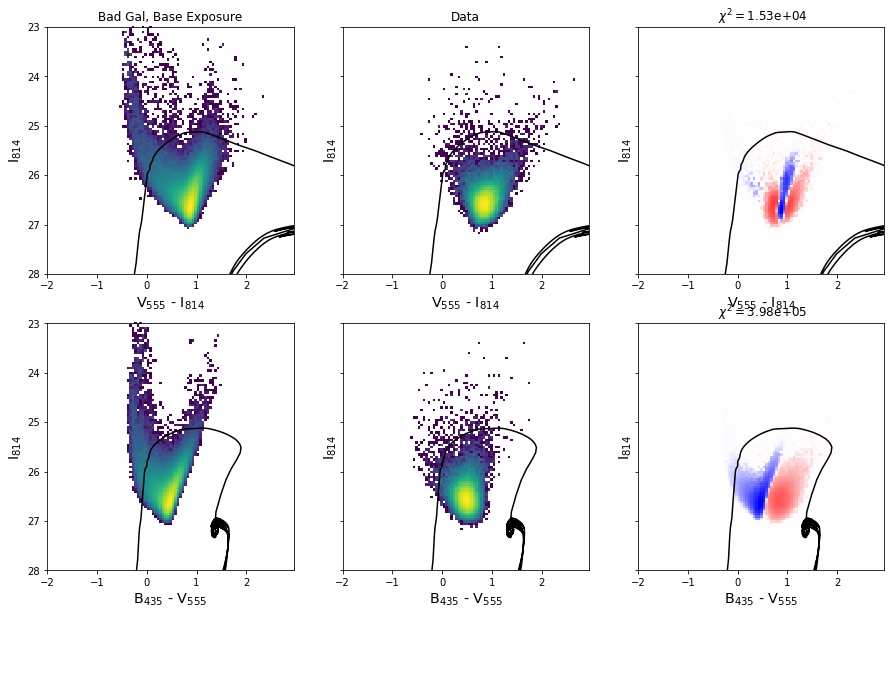

In [57]:
compare(pcmd1_base, label='Bad Gal, Base Exposure');

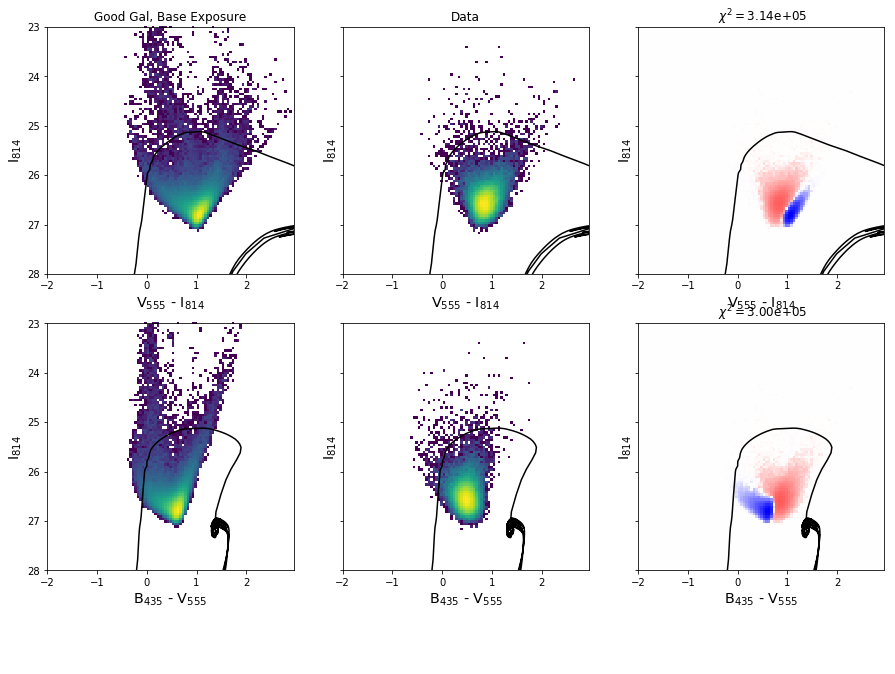

In [58]:
compare(pcmd2_base, label='Good Gal, Base Exposure');

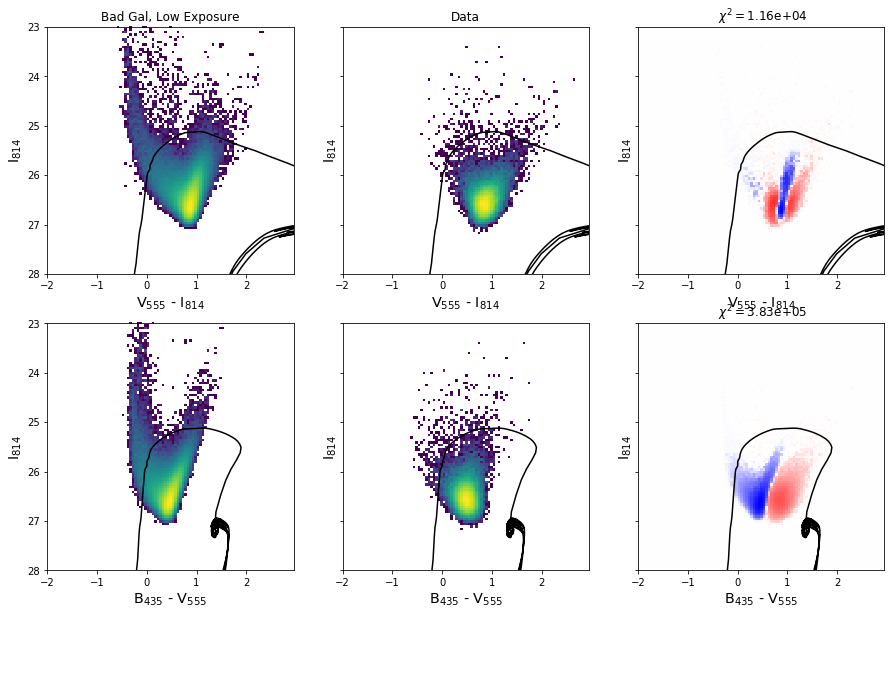

In [59]:
compare(pcmd1_low, label='Bad Gal, Low Exposure');

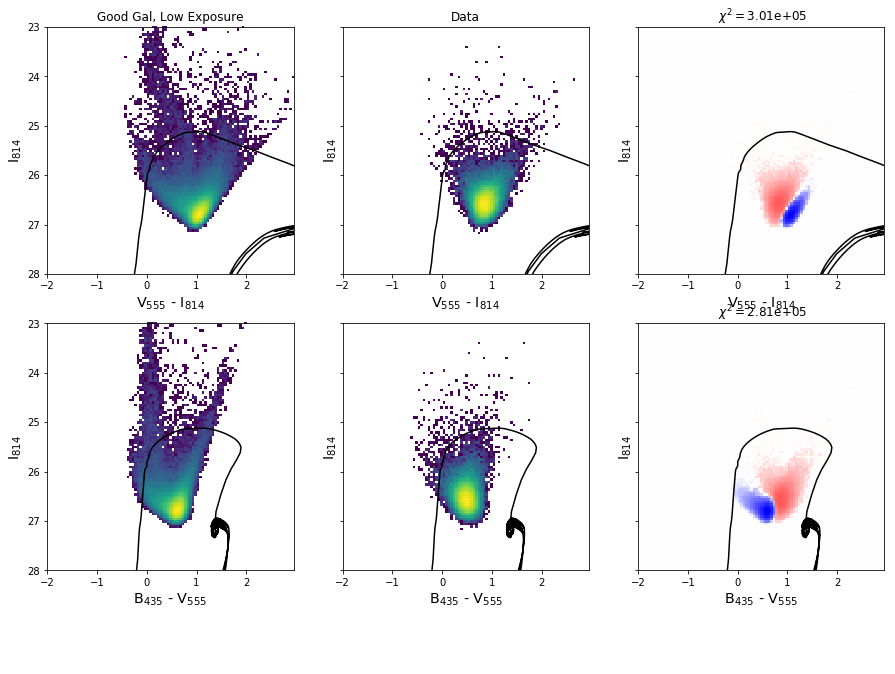

In [60]:
compare(pcmd2_low, label='Good Gal, Low Exposure');

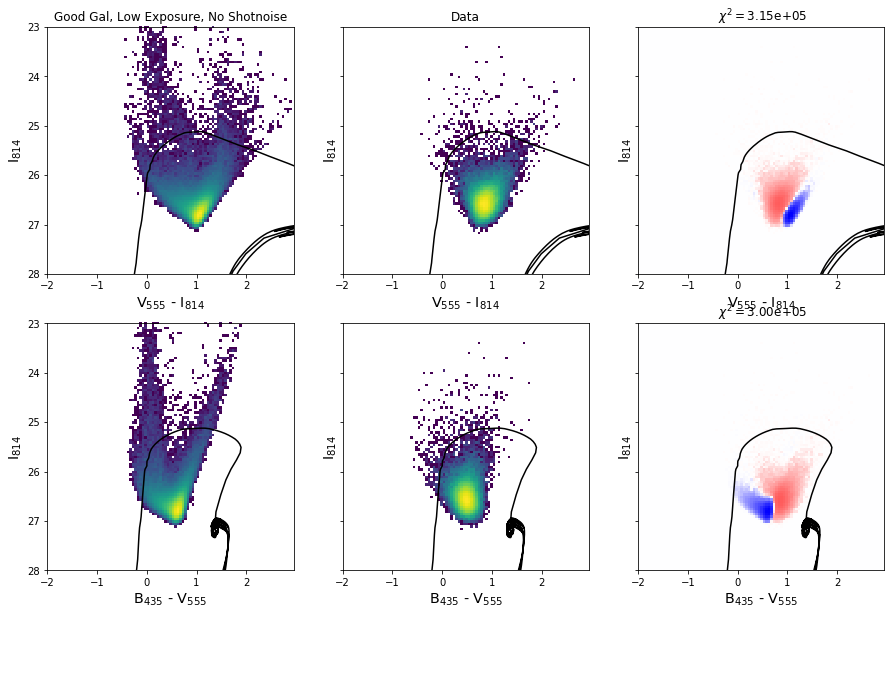

In [61]:
compare(pcmd2_noshot, label='Good Gal, Low Exposure, No Shotnoise');